In [107]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [57]:
base_path = Path('/home/lchanch/models/ERM/eval/')
attributes = ['sex', 'ethnicity', 'age', 'sex_ethnicity']

df_test_results = {}
df_lr_results = {}

# read files
for attr in attributes:
    test_file = base_path / f'test_results_all_{attr}.csv'
    lr_file = base_path / f'lr_results_all_{attr}.csv'

    df_test_results[attr] = pd.read_csv(test_file)
    df_lr_results[attr] = pd.read_csv(lr_file)


In [58]:
df_test_results_sex=df_test_results['sex']
df_test_results_sex.head()

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FN_opt_attr_1,TP_opt_attr_1,FP_opt_attr_1,FNR_opt_attr_1,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1
0,d625628b73ed041fe6e242b79f4575e3,1,7,Cardiomegaly,sex,0.801891,0.728819,0.206678,0.335684,0.664316,...,1035.0,3388.0,6430.0,0.234004,0.319376,0.765996,0.680624,0.180119,0.399821,0.122613
1,62da7a4cc63a8e6972347e6949106c6e,0,6,Cardiomegaly,sex,0.810155,0.724995,0.324546,0.225463,0.774537,...,1479.0,2944.0,4610.0,0.334388,0.228977,0.665612,0.771023,0.180119,0.307623,0.121631
2,936dc28af22a8937d5ca1648d60658a1,1,6,Cardiomegaly,sex,0.807970,0.733852,0.233978,0.298319,0.701681,...,1103.0,3320.0,5946.0,0.249378,0.295336,0.750622,0.704664,0.180119,0.377342,0.121420
3,f32cb72bdc9a563e1c56102f9cb33081,2,10,Cardiomegaly,sex,0.500000,0.500000,1.000000,0.000000,1.000000,...,4423.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.180119,0.000000,0.180119
4,e1beea1889772e1849e1445abf47cb56,1,3,Cardiomegaly,sex,0.725617,0.662602,0.194728,0.480069,0.519931,...,944.0,3479.0,9177.0,0.213430,0.455819,0.786570,0.544181,0.180119,0.515393,0.135331


In [ ]:
#===================SEX==========================

In [59]:
#best models sex
store_names_best_sex = [
    "62da7a4cc63a8e6972347e6949106c6e",  # Cardiomegaly
    "8567bca8c4876916928b7465a52cdeae",  # No Finding
    "b73aa9e925863665502c5e22300e663f",  # Pleural Effusion
    "2254ef4aeff39e3bbd73d8f30e0567a1",  # Pneumothorax
]
# 
df_best_models_sex = df_test_results_sex[
    df_test_results_sex["store_name"].isin(store_names_best_sex)
]

df_best_models_sex

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FN_opt_attr_1,TP_opt_attr_1,FP_opt_attr_1,FNR_opt_attr_1,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1
1,62da7a4cc63a8e6972347e6949106c6e,0,6,Cardiomegaly,sex,0.810155,0.724995,0.324546,0.225463,0.774537,...,1479.0,2944.0,4610.0,0.334388,0.228977,0.665612,0.771023,0.180119,0.307623,0.121631
66,8567bca8c4876916928b7465a52cdeae,0,1,No Finding,sex,0.849310,0.777068,0.216845,0.229018,0.770982,...,2103.0,6414.0,3448.0,0.246918,0.214976,0.753082,0.785024,0.346840,0.401613,0.151134
95,b73aa9e925863665502c5e22300e663f,2,1,Pleural Effusion,sex,0.924693,0.842687,0.203893,0.110733,0.889267,...,1123.0,4495.0,2409.0,0.199893,0.127205,0.800107,0.872795,0.228783,0.281153,0.094551
108,2254ef4aeff39e3bbd73d8f30e0567a1,1,1,Pneumothorax,sex,0.867827,0.673494,0.630589,0.022423,0.977577,...,697.0,454.0,576.0,0.605560,0.024610,0.394440,0.975390,0.046872,0.041945,0.036534


In [60]:
def add_classification_metrics(df):
    """
    Add Recall, Specificity, Precision y F1-score
    using TP, TN, FP, FN from test set (_te).
    """
    df = df.copy()

    df['precision'] = df['TP_opt_te'] / (df['TP_opt_te'] + df['FP_opt_te'])
    df['recall'] = df['TP_opt_te'] / (df['TP_opt_te'] + df['FN_opt_te'])
    df['f1_score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])
    df['specificity'] = df['TN_opt_te'] / (df['TN_opt_te'] + df['FP_opt_te'])
   
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

In [61]:
df_best_models_sex=add_classification_metrics(df_best_models_sex)

In [62]:
df_best_models_sex

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,TNR_opt_te,...,FPR_opt_attr_1,TPR_opt_attr_1,TNR_opt_attr_1,prevalence_opt_attr_1,pred_prevalence_opt_attr_1,brier_attr_1,precision,recall,f1_score,specificity
1,62da7a4cc63a8e6972347e6949106c6e,0,6,Cardiomegaly,sex,0.810155,0.724995,0.324546,0.225463,0.774537,...,0.228977,0.665612,0.771023,0.180119,0.307623,0.121631,0.399515,0.675454,0.502068,0.774537
66,8567bca8c4876916928b7465a52cdeae,0,1,No Finding,sex,0.849310,0.777068,0.216845,0.229018,0.770982,...,0.214976,0.753082,0.785024,0.346840,0.401613,0.151134,0.667190,0.783155,0.720536,0.770982
95,b73aa9e925863665502c5e22300e663f,2,1,Pleural Effusion,sex,0.924693,0.842687,0.203893,0.110733,0.889267,...,0.127205,0.800107,0.872795,0.228783,0.281153,0.094551,0.668137,0.796107,0.726530,0.889267
108,2254ef4aeff39e3bbd73d8f30e0567a1,1,1,Pneumothorax,sex,0.867827,0.673494,0.630589,0.022423,0.977577,...,0.024610,0.394440,0.975390,0.046872,0.041945,0.036534,0.418779,0.369411,0.392549,0.977577


In [63]:
df_best_models_sex.columns

Index(['store_name', 'seed', 'hparams_seed', 'task', 'attr', 'AUROC_te',
       'balanced_acc_opt_te', 'FNR_opt_te', 'FPR_opt_te', 'TNR_opt_te',
       'TPR_opt_te', 'TP_opt_te', 'TN_opt_te', 'FP_opt_te', 'FN_opt_te',
       'brier_te', 'AUROC_va', 'balanced_acc_opt_va', 'FNR_opt_va',
       'FPR_opt_va', 'TNR_opt_va', 'TPR_opt_va', 'TP_opt_va', 'TN_opt_va',
       'FP_opt_va', 'FN_opt_va', 'brier_va', 'fair_gap', 'fair_metric',
       'fair_gap_desc', 'AUROC_attr_0', 'balanced_acc_attr_0', 'TN_opt_attr_0',
       'FN_opt_attr_0', 'TP_opt_attr_0', 'FP_opt_attr_0', 'FNR_opt_attr_0',
       'FPR_opt_attr_0', 'TPR_opt_attr_0', 'TNR_opt_attr_0',
       'prevalence_opt_attr_0', 'pred_prevalence_opt_attr_0', 'brier_attr_0',
       'AUROC_attr_1', 'balanced_acc_attr_1', 'TN_opt_attr_1', 'FN_opt_attr_1',
       'TP_opt_attr_1', 'FP_opt_attr_1', 'FNR_opt_attr_1', 'FPR_opt_attr_1',
       'TPR_opt_attr_1', 'TNR_opt_attr_1', 'prevalence_opt_attr_1',
       'pred_prevalence_opt_attr_1', 'brier_att

In [ ]:
#------------------------overall performance------------------------

In [65]:
df_best_models_sex_t1=df_best_models_sex[['task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te']]
df_best_models_sex_t1

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te
1,Cardiomegaly,sex,0.810155,0.724995,0.121348
66,No Finding,sex,0.849310,0.777068,0.150033
95,Pleural Effusion,sex,0.924693,0.842687,0.087145
108,Pneumothorax,sex,0.867827,0.673494,0.033442


In [66]:
df_best_models_sex_t2=df_best_models_sex[['task','attr','precision','recall', 'f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_sex_t2

,task,attr,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
1,Cardiomegaly,sex,0.399515,0.675454,0.502068,0.324546,0.225463
66,No Finding,sex,0.667190,0.783155,0.720536,0.216845,0.229018
95,Pleural Effusion,sex,0.668137,0.796107,0.726530,0.203893,0.110733
108,Pneumothorax,sex,0.418779,0.369411,0.392549,0.630589,0.022423


In [90]:
df_best_models_sex_complete = pd.merge(
    df_best_models_sex_t1,
    df_best_models_sex_t2,
    on=['task', 'attr'],
    how='inner')

df_best_models_sex_complete

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,Cardiomegaly,sex,0.810155,0.724995,0.121348,0.399515,0.675454,0.502068,0.324546,0.225463
1,No Finding,sex,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
2,Pleural Effusion,sex,0.924693,0.842687,0.087145,0.668137,0.796107,0.726530,0.203893,0.110733
3,Pneumothorax,sex,0.867827,0.673494,0.033442,0.418779,0.369411,0.392549,0.630589,0.022423


In [108]:
df_NF_sex_ERM=df_best_models_sex_complete[df_best_models_sex_complete['task'] == 'No Finding']
df_NF_sex_ERM

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
1,No Finding,sex,0.84931,0.777068,0.150033,0.66719,0.783155,0.720536,0.216845,0.229018


In [109]:
df_NF_sex_ERM.to_csv("overall_per_NF_sex_ERM.csv", index=False)

In [ ]:
#------------------------group wise------------------------

In [55]:
df_best_models_sex[['task','attr','TPR_opt_attr_1', 'TPR_opt_attr_0','FNR_opt_attr_1', 'FNR_opt_attr_0', 'FPR_opt_attr_1','FPR_opt_attr_0', 'FNR_opt_te','FPR_opt_te', 'TPR_opt_te','recall']]

,task,attr,TPR_opt_attr_1,TPR_opt_attr_0,FNR_opt_attr_1,FNR_opt_attr_0,FPR_opt_attr_1,FPR_opt_attr_0,FNR_opt_te,FPR_opt_te,TPR_opt_te,recall
1,Cardiomegaly,sex,0.665612,0.686041,0.334388,0.313959,0.228977,0.221597,0.324546,0.225463,0.675454,0.675454
66,No Finding,sex,0.753082,0.812125,0.246918,0.187875,0.214976,0.245615,0.216845,0.229018,0.783155,0.783155
95,Pleural Effusion,sex,0.800107,0.791282,0.199893,0.208718,0.127205,0.093162,0.203893,0.110733,0.796107,0.796107
108,Pneumothorax,sex,0.394440,0.334149,0.605560,0.665851,0.024610,0.020052,0.630589,0.022423,0.369411,0.369411


In [ ]:
#===================SEX==========================

In [ ]:
#===================RACE==========================

In [67]:
#best models race
df_test_results_race=df_test_results['ethnicity']

store_names_best_race = [
    "f33c28fbb7c9261fd5bfacaaa32e5011",  # Cardiomegaly
    "9dc25811e744369d2707c706df7f4068",  # No Finding
    "70d3048b4e48381e174cd9189833f453",  # Pleural Effusion
    "18bb25571076cd85c2094f5f56772584",  # Pneumothorax
]

df_best_models_race = df_test_results_race[
    df_test_results_race["store_name"].isin(store_names_best_race)
]

df_best_models_race[['store_name', 'hparams_seed', 'task', 'attr', 'AUROC_te', 'AUROC_va', 'balanced_acc_opt_te', 'balanced_acc_opt_va','TP_opt_te', 'TN_opt_te', 'FP_opt_te', 'FN_opt_te']]

,store_name,hparams_seed,task,attr,AUROC_te,AUROC_va,balanced_acc_opt_te,balanced_acc_opt_va,TP_opt_te,TN_opt_te,FP_opt_te,FN_opt_te
16,f33c28fbb7c9261fd5bfacaaa32e5011,1,Cardiomegaly,ethnicity,0.810514,0.815855,0.725267,0.734921,5713,30022,8410,2822
39,9dc25811e744369d2707c706df7f4068,1,No Finding,ethnicity,0.849310,0.846209,0.777068,0.772048,13594,22828,6781,3764
70,70d3048b4e48381e174cd9189833f453,9,Pleural Effusion,ethnicity,0.925251,0.923085,0.836566,0.834128,7966,32944,3748,2309
129,18bb25571076cd85c2094f5f56772584,1,Pneumothorax,ethnicity,0.855423,0.862240,0.663243,0.670446,694,43822,1177,1274


In [75]:
df_best_models_race=add_classification_metrics(df_best_models_race)

In [ ]:
#------------------------overall performance------------------------

In [69]:
df_best_models_race_t1=df_best_models_race[['task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te']]
df_best_models_race_t1

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te
16,Cardiomegaly,ethnicity,0.810514,0.725267,0.119992
39,No Finding,ethnicity,0.849310,0.777068,0.150033
70,Pleural Effusion,ethnicity,0.925251,0.836566,0.087144
129,Pneumothorax,ethnicity,0.855423,0.663243,0.033789


In [77]:
df_best_models_race_t2=df_best_models_race[['task','attr','precision','recall', 'f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_race_t2

,task,attr,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
16,Cardiomegaly,ethnicity,0.404517,0.669361,0.504281,0.330639,0.218828
39,No Finding,ethnicity,0.667190,0.783155,0.720536,0.216845,0.229018
70,Pleural Effusion,ethnicity,0.680041,0.775280,0.724544,0.224720,0.102148
129,Pneumothorax,ethnicity,0.370925,0.352642,0.361552,0.647358,0.026156


In [91]:
df_best_models_race_complete = pd.merge(
    df_best_models_race_t1,
    df_best_models_race_t2,
    on=['task', 'attr'],
    how='inner')

df_best_models_race_complete

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,Cardiomegaly,ethnicity,0.810514,0.725267,0.119992,0.404517,0.669361,0.504281,0.330639,0.218828
1,No Finding,ethnicity,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
2,Pleural Effusion,ethnicity,0.925251,0.836566,0.087144,0.680041,0.775280,0.724544,0.224720,0.102148
3,Pneumothorax,ethnicity,0.855423,0.663243,0.033789,0.370925,0.352642,0.361552,0.647358,0.026156


In [ ]:
#------------------------overall performance------------------------

In [ ]:
#===================RACE==========================

In [ ]:
#===================SEX-RACE==========================

In [79]:
#best models sex-race
df_test_results_sex_race=df_test_results['sex_ethnicity']

store_names_best_sex_race = [
    "43da53fde9b217ca8b7d6ff23d5a3fa8",  # Cardiomegaly
    "1a924dc85b4610007ffb0473b83881b2",  # No Finding
    "aa71e611fa4ed23a9d6e0c51f26eb581",  # Pleural Effusion
    "5d72ae458ded4e405994d9c8666df629",  # Pneumothorax
]

df_best_models_sex_race = df_test_results_sex_race[
    df_test_results_sex_race["store_name"].isin(store_names_best_sex_race)
]

df_best_models_sex_race[['store_name', 'hparams_seed', 'task', 'attr', 'AUROC_te', 'AUROC_va', 'balanced_acc_opt_te', 'balanced_acc_opt_va','TP_opt_te', 'TN_opt_te', 'FP_opt_te', 'FN_opt_te']]

,store_name,hparams_seed,task,attr,AUROC_te,AUROC_va,balanced_acc_opt_te,balanced_acc_opt_va,TP_opt_te,TN_opt_te,FP_opt_te,FN_opt_te
16,43da53fde9b217ca8b7d6ff23d5a3fa8,9,Cardiomegaly,sex_ethnicity,0.808591,0.812549,0.721178,0.729790,5629,30086,8346,2906
44,1a924dc85b4610007ffb0473b83881b2,1,No Finding,sex_ethnicity,0.849310,0.846209,0.777068,0.772048,13594,22828,6781,3764
93,aa71e611fa4ed23a9d6e0c51f26eb581,1,Pleural Effusion,sex_ethnicity,0.922972,0.921514,0.842227,0.842304,8240,32381,4311,2035
111,5d72ae458ded4e405994d9c8666df629,1,Pneumothorax,sex_ethnicity,0.867827,0.866831,0.673494,0.677156,727,43990,1009,1241


In [80]:
df_best_models_sex_race=add_classification_metrics(df_best_models_sex_race)

In [81]:
df_best_models_sex_race_t1=df_best_models_sex_race[['task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te']]
df_best_models_sex_race_t1

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te
16,Cardiomegaly,sex_ethnicity,0.808591,0.721178,0.122234
44,No Finding,sex_ethnicity,0.849310,0.777068,0.150033
93,Pleural Effusion,sex_ethnicity,0.922972,0.842227,0.088465
111,Pneumothorax,sex_ethnicity,0.867827,0.673494,0.033442


In [82]:
df_best_models_sex_race_t2=df_best_models_sex_race[['task','attr','precision','recall', 'f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_sex_race_t2

,task,attr,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
16,Cardiomegaly,sex_ethnicity,0.402791,0.659520,0.500133,0.340480,0.217163
44,No Finding,sex_ethnicity,0.667190,0.783155,0.720536,0.216845,0.229018
93,Pleural Effusion,sex_ethnicity,0.656521,0.801946,0.721984,0.198054,0.117492
111,Pneumothorax,sex_ethnicity,0.418779,0.369411,0.392549,0.630589,0.022423


In [92]:
df_best_models_sex_race_complete = pd.merge(
    df_best_models_sex_race_t1,
    df_best_models_sex_race_t2,
    on=['task', 'attr'],
    how='inner')

df_best_models_sex_race_complete

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,Cardiomegaly,sex_ethnicity,0.808591,0.721178,0.122234,0.402791,0.659520,0.500133,0.340480,0.217163
1,No Finding,sex_ethnicity,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
2,Pleural Effusion,sex_ethnicity,0.922972,0.842227,0.088465,0.656521,0.801946,0.721984,0.198054,0.117492
3,Pneumothorax,sex_ethnicity,0.867827,0.673494,0.033442,0.418779,0.369411,0.392549,0.630589,0.022423


In [ ]:
#------------------------overall performance------------------------

In [ ]:
#=================== AGE ==========================

In [85]:
#best models age
df_test_results_age=df_test_results['age']

store_names_best_age = [
    "1ee839af3a66af2f63fe2f628d1ccdab",  # Cardiomegaly
    "96f9f3456d6008db8711d40a2be36a50",  # No Finding
    "89d0fa5c1bb5fd12170687b40fed2f18",  # Pleural Effusion
    "19162059f762f34f95a00aebe9a887c1",  # Pneumothorax
]

df_best_models_age = df_test_results_age[
    df_test_results_age["store_name"].isin(store_names_best_age)
]

df_best_models_age[['store_name', 'hparams_seed', 'task', 'attr', 'AUROC_te', 'AUROC_va', 'balanced_acc_opt_te', 'balanced_acc_opt_va','TP_opt_te', 'TN_opt_te', 'FP_opt_te', 'FN_opt_te']]

,store_name,hparams_seed,task,attr,AUROC_te,AUROC_va,balanced_acc_opt_te,balanced_acc_opt_va,TP_opt_te,TN_opt_te,FP_opt_te,FN_opt_te
31,1ee839af3a66af2f63fe2f628d1ccdab,1,Cardiomegaly,age,0.810514,0.815855,0.725267,0.734921,5713,30022,8410,2822
52,96f9f3456d6008db8711d40a2be36a50,9,No Finding,age,0.846590,0.843417,0.774479,0.770433,13969,22035,7574,3389
85,89d0fa5c1bb5fd12170687b40fed2f18,1,Pleural Effusion,age,0.924693,0.922617,0.842687,0.839587,8180,32629,4063,2095
125,19162059f762f34f95a00aebe9a887c1,1,Pneumothorax,age,0.855423,0.862240,0.663243,0.670446,694,43822,1177,1274


In [86]:
df_best_models_age=add_classification_metrics(df_best_models_age)

In [ ]:
#-----------overall metrics------------

In [87]:
df_best_models_age_t1=df_best_models_age[['task','attr','AUROC_te','balanced_acc_opt_te', 'brier_te']]
df_best_models_age_t1

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te
31,Cardiomegaly,age,0.810514,0.725267,0.119992
52,No Finding,age,0.846590,0.774479,0.151938
85,Pleural Effusion,age,0.924693,0.842687,0.087145
125,Pneumothorax,age,0.855423,0.663243,0.033789


In [88]:
df_best_models_age_t2=df_best_models_age[['task','attr','precision','recall', 'f1_score', 'FNR_opt_te', 'FPR_opt_te']]
df_best_models_age_t2

,task,attr,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
31,Cardiomegaly,age,0.404517,0.669361,0.504281,0.330639,0.218828
52,No Finding,age,0.648424,0.804759,0.718182,0.195241,0.255801
85,Pleural Effusion,age,0.668137,0.796107,0.726530,0.203893,0.110733
125,Pneumothorax,age,0.370925,0.352642,0.361552,0.647358,0.026156


In [93]:
df_best_models_age_complete = pd.merge(
    df_best_models_age_t1,
    df_best_models_age_t2,
    on=['task', 'attr'],
    how='inner')

df_best_models_age_complete

,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,Cardiomegaly,age,0.810514,0.725267,0.119992,0.404517,0.669361,0.504281,0.330639,0.218828
1,No Finding,age,0.846590,0.774479,0.151938,0.648424,0.804759,0.718182,0.195241,0.255801
2,Pleural Effusion,age,0.924693,0.842687,0.087145,0.668137,0.796107,0.726530,0.203893,0.110733
3,Pneumothorax,age,0.855423,0.663243,0.033789,0.370925,0.352642,0.361552,0.647358,0.026156


In [ ]:
#-----------overall metrics------------

In [ ]:
#=================== AGE ==========================

In [ ]:
#--------overall graphics-.--------

In [94]:
df_overall_complete = pd.concat(
    [df_best_models_sex_complete, df_best_models_race_complete, df_best_models_sex_race_complete, df_best_models_age_complete],
    axis=0,         
    ignore_index=True
)

df_overall_complete


,task,attr,AUROC_te,balanced_acc_opt_te,brier_te,precision,recall,f1_score,FNR_opt_te,FPR_opt_te
0,Cardiomegaly,sex,0.810155,0.724995,0.121348,0.399515,0.675454,0.502068,0.324546,0.225463
1,No Finding,sex,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
2,Pleural Effusion,sex,0.924693,0.842687,0.087145,0.668137,0.796107,0.726530,0.203893,0.110733
3,Pneumothorax,sex,0.867827,0.673494,0.033442,0.418779,0.369411,0.392549,0.630589,0.022423
4,Cardiomegaly,ethnicity,0.810514,0.725267,0.119992,0.404517,0.669361,0.504281,0.330639,0.218828
5,No Finding,ethnicity,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018
6,Pleural Effusion,ethnicity,0.925251,0.836566,0.087144,0.680041,0.775280,0.724544,0.224720,0.102148
7,Pneumothorax,ethnicity,0.855423,0.663243,0.033789,0.370925,0.352642,0.361552,0.647358,0.026156
8,Cardiomegaly,sex_ethnicity,0.808591,0.721178,0.122234,0.402791,0.659520,0.500133,0.340480,0.217163
9,No Finding,sex_ethnicity,0.849310,0.777068,0.150033,0.667190,0.783155,0.720536,0.216845,0.229018


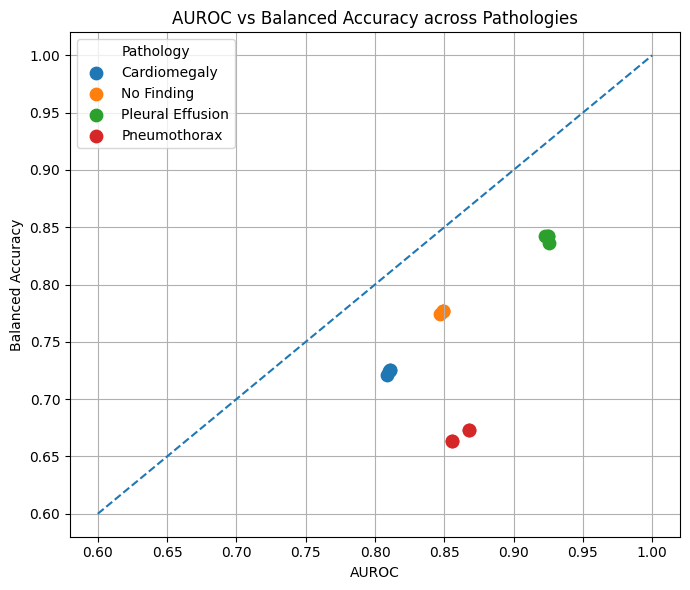

In [97]:
plt.figure(figsize=(7, 6))

for pathology in df_overall_complete["task"].unique():
    subset = df_overall_complete[df_overall_complete["task"] == pathology]
    plt.scatter(
        subset["AUROC_te"],
        subset["balanced_acc_opt_te"],
        s=80,
        label=pathology
    )


x = [0.6, 1.0] # ideal
plt.plot(x, x, linestyle="--")

plt.xlabel("AUROC")
plt.ylabel("Balanced Accuracy")
plt.title("AUROC vs Balanced Accuracy across Pathologies")
plt.legend(title="Pathology")
plt.grid(True)

plt.tight_layout()
plt.show()

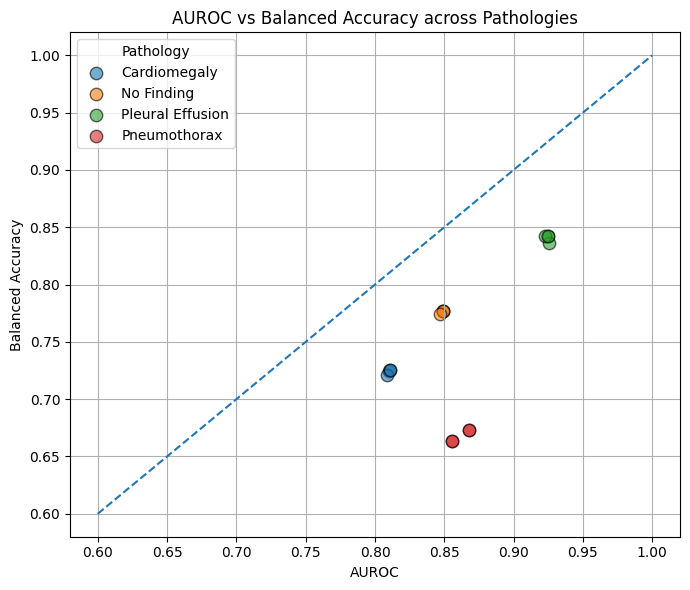

In [98]:
plt.figure(figsize=(7, 6))

for pathology in df_overall_complete["task"].unique():
    subset = df_overall_complete[df_overall_complete["task"] == pathology]
    plt.scatter(
        subset["AUROC_te"],
        subset["balanced_acc_opt_te"],
        s=80,
        alpha=0.6,
        edgecolor="black",
        label=pathology
    )

plt.plot([0.6, 1.0], [0.6, 1.0], linestyle="--")

plt.xlabel("AUROC")
plt.ylabel("Balanced Accuracy")
plt.title("AUROC vs Balanced Accuracy across Pathologies")
plt.legend(title="Pathology")
plt.grid(True)
plt.tight_layout()
plt.show()


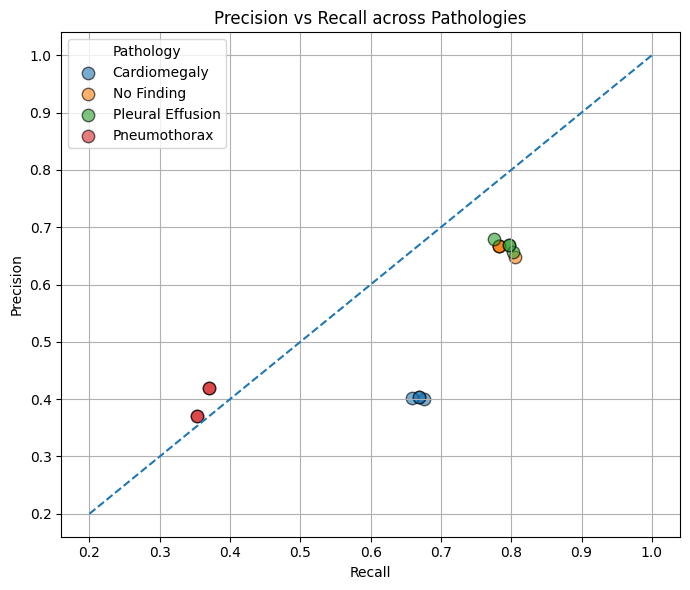

In [104]:
plt.figure(figsize=(7, 6))

for pathology in df_overall_complete["task"].unique():
    subset = df_overall_complete[df_overall_complete["task"] == pathology]
    plt.scatter(
        subset["recall"],
        subset["precision"],
        s=80,
        alpha=0.6,
        edgecolor="black",
        label=pathology
    )

plt.plot([0.2, 1.0], [0.2, 1.0], linestyle="--")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall across Pathologies")
plt.legend(title="Pathology")
plt.grid(True)
plt.tight_layout()
plt.show()


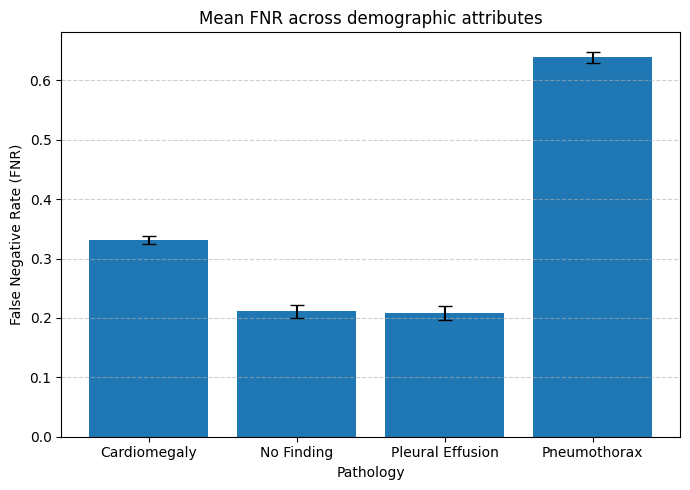

In [105]:
#bar plot

fnr_stats = (
    df_overall_complete
    .groupby("task")["FNR_opt_te"]
    .agg(["mean", "std"])
    .reset_index()
)

plt.figure(figsize=(7, 5))

plt.bar(
    fnr_stats["task"],
    fnr_stats["mean"],
    yerr=fnr_stats["std"],
    capsize=5
)

plt.ylabel("False Negative Rate (FNR)")
plt.xlabel("Pathology")
plt.title("Mean FNR across demographic attributes")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#--------overall graphics-.--------